In [2]:
cd g:\data science\projects\Customer churn

g:\data science\projects\Customer churn


# Telecommunications customer churn

## Overview

In this project, I'll be trying to build a machine learning classifier to determine whether or not customers of a telecommunications company will terminate their service (referred to as "churn") based on detailed data relating to the customers' service.

## Data cleaning

The data can be found at https://www.kaggle.com/blastchar/telco-customer-churn. Let's import it into a pandas dataframe and have a look.

In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('churn-dataset.csv')
data

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


There's a lot of data collected for each customer, some variables being numerical (eg "tenure", which tells us how many months the customer has had their service), and some variables having string values (eg "InternetService", which tells us the type of internet connection the customer is getting with their service). In order to process any data of this latter form, it's important to convert these strings into numbers.

In [4]:
labels = {}
dataNum = pd.DataFrame()

def labelWithNumbers(column):
    
    # Get unique entries of the column
    entries = data[column].unique().tolist()
    
    # Ignore columns with data that is already numeric
    if type(entries[0]) != str:
        dataNum[column] = data[column]
        return 'Already numeric'
    
    # If column contains binary yes/no data, always make 0 corresponds to no and 1 corresponds to yes
    if entries == ['Yes', 'No']:
        entries = ['No', 'Yes']
        
    # Replace column entries with their associated index in the 'entries' list
    dataNum[column] = data[column].map(lambda x: entries.index(x))
    
    # Write entries/index to labels dictionary
    labels.update({column : entries})
    
    return 'Successful'

This function will take a column of the dataframe, and, for each unique string value appearing in the column, replace each instance of this string with a particular number. The mappings of indices to strings for the column will then be stored in the "labels" dictionary.

Let's apply this to all the columns in the dataframe.

In [5]:
for i in list(data):
    labelWithNumbers(i)

dataNum

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,1,0,1,0,0,0,0,...,0,0,0,0,0,1,0,29.85,0,0
1,1,1,0,0,0,34,1,1,0,1,...,1,0,0,0,1,0,1,56.95,1,0
2,2,1,0,0,0,2,1,1,0,1,...,0,0,0,0,0,1,1,53.85,2,1
3,3,1,0,0,0,45,0,0,0,1,...,1,1,0,0,1,0,2,42.30,3,0
4,4,0,0,0,0,2,1,1,1,0,...,0,0,0,0,0,1,0,70.70,4,1
5,5,0,0,0,0,8,1,2,1,0,...,1,0,1,1,0,1,0,99.65,5,1
6,6,1,0,0,1,22,1,2,1,0,...,0,0,1,0,0,1,3,89.10,6,0
7,7,0,0,0,0,10,0,0,0,1,...,0,0,0,0,0,0,1,29.75,7,0
8,8,0,0,1,0,28,1,2,1,0,...,1,1,1,1,0,1,0,104.80,8,1
9,9,1,0,0,1,62,1,1,0,1,...,0,0,0,0,1,0,2,56.15,9,0


This data looks more appropriate. If we want to see what these values mean, we can look them up in the labels dictionary.

In [6]:
labels['InternetService']

['DSL', 'Fiber optic', 'No']

So, in the "InternetService" column of this new dataframe, a 0 corresponds to "DSL", 1 corresponds to "Fiber optic", and 2 corresponds to "No".

There's one anomaly in the data we need to deal with. In the original dataset, the "TotalCharges" column contains float numbers, but they are represented as strings. We'll need to convert them to float numbers for them to be processed correctly. In this column, there appears to be one blank entry "' '". Since this is not a significant amount of data we can delete this whole row.

In [23]:
def strToFloat(s):
    if s == ' ': # If entry is empty, cast as nan (row will then be deleted)
        return np.nan
    return float(s)

# Apply function to get TotalCharges column with float entries
dataNum['TotalCharges'] = data['TotalCharges'].map(strToFloat)
dataNum = dataNum.dropna()

# Delete customerID column as it isn't needed
if 'customerID' in list(dataNum):
    dataNum = dataNum.drop(columns = ['customerID'])

dataNum

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,29.85,29.85,0
1,1,0,0,0,34,1,1,0,1,1,1,0,0,0,1,0,1,56.95,1889.50,0
2,1,0,0,0,2,1,1,0,1,0,0,0,0,0,0,1,1,53.85,108.15,1
3,1,0,0,0,45,0,0,0,1,1,1,1,0,0,1,0,2,42.30,1840.75,0
4,0,0,0,0,2,1,1,1,0,1,0,0,0,0,0,1,0,70.70,151.65,1
5,0,0,0,0,8,1,2,1,0,1,1,0,1,1,0,1,0,99.65,820.50,1
6,1,0,0,1,22,1,2,1,0,0,0,0,1,0,0,1,3,89.10,1949.40,0
7,0,0,0,0,10,0,0,0,1,1,0,0,0,0,0,0,1,29.75,301.90,0
8,0,0,1,0,28,1,2,1,0,1,1,1,1,1,0,1,0,104.80,3046.05,1
9,1,0,0,1,62,1,1,0,1,0,0,0,0,0,1,0,2,56.15,3487.95,0


## Data exploration

Let's have a look at the data. Firstly, the proportion of customers which terminated their services:

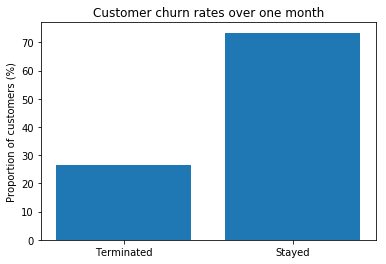

In [25]:
churn = (np.array(dataNum.Churn) == 1).sum()/len(np.array(dataNum.Churn))

import matplotlib.pyplot as plt
plt.bar(['Terminated', 'Stayed'], [100 * churn, 100*(1-churn)])
plt.title('Customer churn rates over one month')
plt.ylabel('Proportion of customers (%)')
plt.show()

So, over a one month period, we can expect around 27% of customers to terminate their service. Let's see if we can discern any trends regarding who is likely to terminate their service.

As a metric of the effect of a particular property, we can consider the rate of service termination for customers with this property relative to the overall rate of customer churn, 27%.

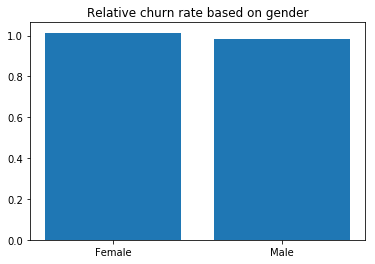

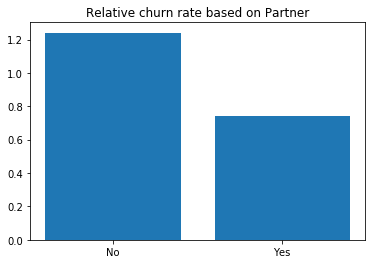

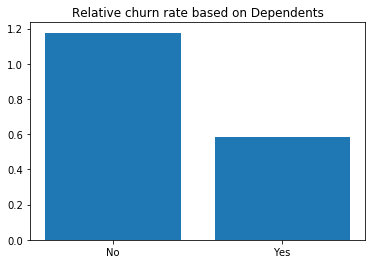

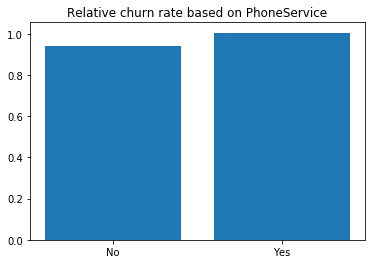

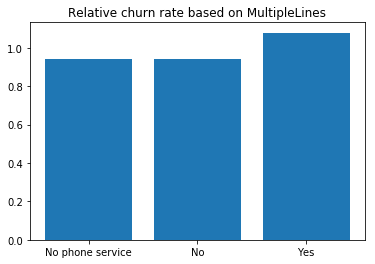

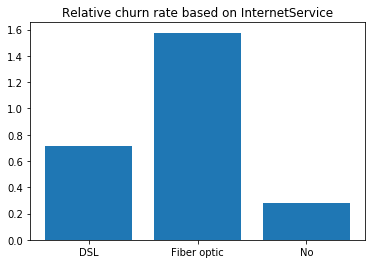

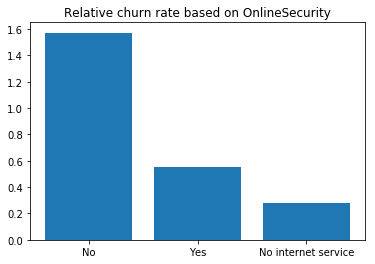

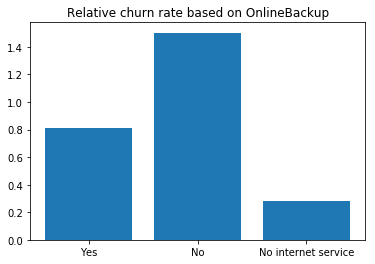

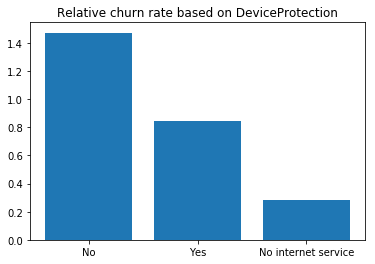

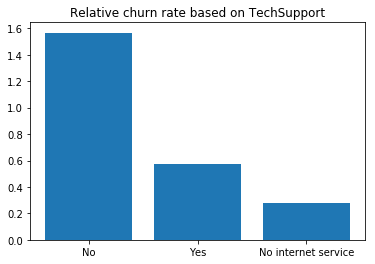

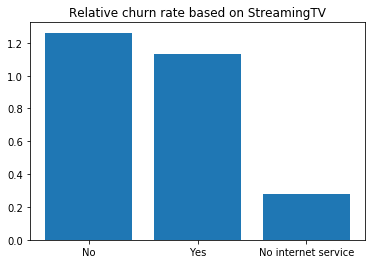

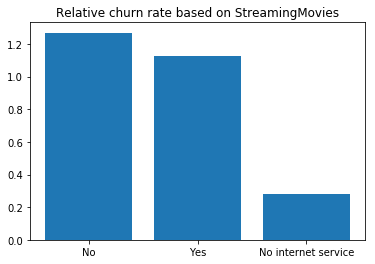

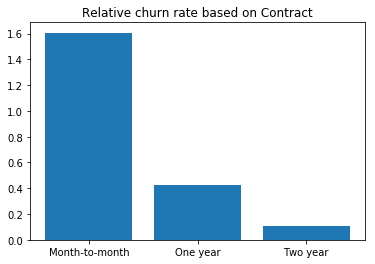

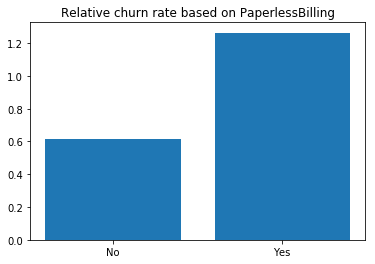

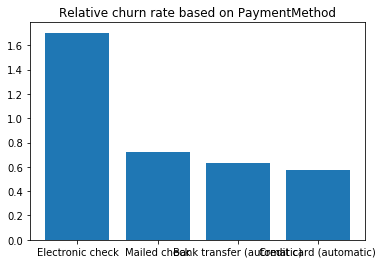

In [67]:
relativeChurn = lambda df: ((np.array(df.Churn) == 1).sum() / len(df)) / churn

relativeChurn(dataNum[dataNum.Dependents == 0])

for feature, labelList in labels.items():
    if feature != 'Churn':
        rcList = []

        for index, value in enumerate(labelList):
            rc = relativeChurn(dataNum[dataNum[feature] == index])
            rcList.append(rc)

        plt.bar(labelList, rcList)
        plt.title('Relative churn rate based on ' + feature)
        plt.show()

## Predictive modelling

Now, let's see how powerful the features of the customer's subscriptions are when it comes to predicting whether or not they terminate their service.

Let's set up the features and labels, and split into training and testing data.

In [10]:
features = dataNum.loc[:, dataNum.columns != 'Churn'].columns.tolist()
X = np.array(dataNum.loc[:, dataNum.columns != 'Churn'])
Y = np.array(dataNum.Churn)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

I'll define a function to get some performance metrics on a classifier's prediction

In [13]:
def recall(y_test, pred):
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import accuracy_score
    
    acc = accuracy_score(y_test, pred)
    
    C = confusion_matrix(y_test, pred)
    #C[i,j] gives number of points in class i classified into class j

    rec0 = C[0,0]/(C[0,0] + C[0,1])
    prec0 = C[0,0]/(C[0,0] + C[1,0])
    rec1 = C[1,1]/(C[1,1] + C[1,0])
    prec1 = C[1,1]/(C[1,1] + C[0,1])

    print("Returning customer recall: %.0f%%" % (100 * rec0))
    print("Terminating customer recall: %.0f%%" % (100 * rec1))
    print("Returning customer precision: %.0f%%" % (100 * prec0))
    print("Terminating customer precision: %.0f%%" % (100 * prec1))
    print("Overall review accuracy: %.0f%%" % (100 * acc))
    return

Now let's try a few different algorithms to see what works best.

In [98]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

recall(y_test, pred)

Returning customer recall: 67%
Terminating customer recall: 85%
Returning customer precision: 92%
Terminating customer precision: 50%
Overall review accuracy: 72%


In [104]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(solver = 'lbfgs', max_iter = 1000, class_weight = {0: 0.35, 1: 0.65})
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

recall(y_test, pred)

Returning customer recall: 79%
Terminating customer recall: 75%
Returning customer precision: 89%
Terminating customer precision: 57%
Overall review accuracy: 78%


In [105]:
from sklearn.svm import SVC
clf = SVC(kernel = 'rbf', C = 0.5, gamma = 'scale')
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

recall(y_test, pred)

Returning customer recall: 94%
Terminating customer recall: 33%
Returning customer precision: 79%
Terminating customer precision: 68%
Overall review accuracy: 77%


In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators = 100, min_samples_split = 5, class_weight = {0:0.2, 1: 0.8})
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

recall(y_test, pred)

Returning customer recall: 84%
Terminating customer recall: 59%
Returning customer precision: 84%
Terminating customer precision: 59%
Overall review accuracy: 77%


In [ ]:
# SVM parameter search

from sklearn.model_selection import GridSearchCV

parameters = {'C' : [0.01, 1], 'kernel' : ('linear', 'poly', 'sigmoid', 'rbf'), 'gamma' : ('auto', 'scale')}
svr = SVC()
clf = GridSearchCV(svr, parameters)
clf.fit(X_train, y_train)

G:\python\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [152]:
from sklearn.neural_network import MLPClassifier

n_layers = 7
hidden_unit_size = 50

clf = MLPClassifier(solver = 'adam', activation = 'logistic', alpha = 0.0001, hidden_layer_sizes = np.full(n_layers , hidden_unit_size))
clf.fit(X_train, y_train)
pred = clf.predict(X_test)

recall(y_test, pred)

Returning customer recall: 83%
Terminating customer recall: 67%
Returning customer precision: 87%
Terminating customer precision: 60%
Overall review accuracy: 79%


In [154]:
clf.coefs_

[array([[ 1.29995731e-01, -2.40863269e-02,  4.48528179e-02,
          6.21057363e-02,  2.30275509e-01, -4.11506904e-02,
         -1.30983130e-02,  9.12636640e-02, -1.17141494e-01,
         -6.53900869e-02, -1.23098328e-01, -6.61409907e-02,
          1.54787676e-02, -6.08967619e-02, -3.16955562e-03,
          9.89642713e-02, -2.74284192e-01, -3.05194265e-01,
          1.00788336e-01,  8.80069491e-02,  2.83421925e-01,
         -6.85336055e-03, -1.01951192e-01,  8.57888855e-03,
          4.36453812e-02, -5.99391945e-02,  1.05748374e-01,
          6.16526391e-03,  7.93095133e-02,  1.94955195e-01,
         -3.92226870e-02, -2.03109026e-01, -9.75438289e-02,
         -8.87110499e-02, -1.05760650e-01,  1.00649762e-01,
          1.17114019e-01,  4.15316779e-02, -6.64094021e-02,
         -3.21917817e-02,  1.91107239e-01,  4.60707518e-02,
         -1.55970262e-01, -2.89241063e-02, -1.70679153e-01,
          2.10048007e-01,  4.96810079e-02, -1.67410287e-02,
          1.08577131e-02, -9.02099142e-0

In [113]:
np.full(3,1)

array([1, 1, 1])